In [1]:
import pandas as pd

In [136]:
from functional import seq
import csv
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (9,6) 

In [31]:
df = pd.read_csv('results2.csv')

In [32]:
df.head()

,#,D_1,D2_D1,L_D1,L_pist_D1,M,id,p_max,p_min,v_max,e_kin_max,e_kin_0
0,0,46.0,0.15,9.0,4.0,2.6,120625,2.886925e+11,-3.040538e+08,14386.329438,322561.686710,6.324867e+05
1,1,69.0,0.40,13.0,11.0,0.7,257736,5.890561e+09,-3.001241e+08,3759.740523,76643.244715,1.260763e+05
2,2,69.0,0.40,3.0,4.0,0.5,253324,3.395228e+09,-3.000623e+08,2993.721785,9606.216262,2.339078e+04
3,3,69.0,0.90,3.0,15.0,1.8,312467,2.314259e+09,-8.347611e+05,4471.655706,770641.479642,1.136792e+06
4,4,23.0,0.50,10.0,3.0,1.9,56328,3.619395e+09,-3.023127e+08,6667.748937,155150.257210,2.533221e+05


In [37]:
seq(df).take(2)

0,46,0.15,9,4,2.6,120625,2.88693e+11,-3.04054e+08,14386.3,322562,632487
1,69,0.4,13,11,0.7,257736,5.89056e+09,-3.00124e+08,3759.74,76643.2,126076


In [34]:
a = seq(df).group_by(lambda arr: arr[1]).to_dict()
a.keys()

dict_keys([46.0, 69.0, 23.0])

In [43]:
class Entity:
    def __init__(self, arr):
        self.D_1 = arr[1]
        self.D2_D1 = arr[2]
        self.L_D1 = arr[3]
        self.L_pist_D1 = arr[4]
        self.V_0 = arr[5] * 2308
        self.p_max = arr[7] / 1e6
        self.p_min = arr[8] / 1e6
        self.v_max = arr[9]
        self.e_kin_max = arr[10]
        self.e_kin_0 = arr[11]

mega_arr = seq(df).map(lambda arr: Entity(arr)).to_list()

In [92]:
def get_constD1(key=23.0):
    a = seq(mega_arr).group_by(lambda en: en.D_1).to_dict()
    res = a[key]
    res = sorted(res, key=lambda en: en.v_max)
    return res

def by_V0(arr_d_const):
    d = seq(arr_d_const).group_by(lambda en: en.V_0).to_dict()
    return [(v0, sorted(d[v0], key=lambda en: en.v_max)) for v0 in d]
  
def by_D2(arr_v_const):
    d = seq(arr_v_const).group_by(lambda en: en.D2_D1).to_dict()
    return sorted([(d2, sorted(d[d2], key=lambda en: en.v_max)) for d2 in d], key=lambda tp: tp[0])

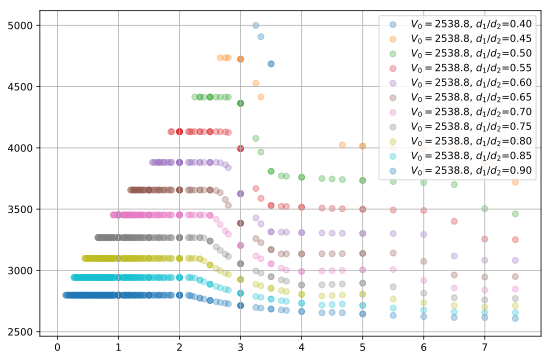

In [154]:
arr_d_const = get_constD1(23.0)
arr_d_const = seq(arr_d_const).filter(lambda en: en.p_max < 3000).to_list()

tup_lst = by_V0(arr_d_const)

for v0, arr in tup_lst[10::10]:
    tup_list_d2 = by_D2(arr)
    for d2, arr2 in tup_list_d2[::]:
        xarr = seq(arr2).sorted(lambda en: en.L_D1/en.L_pist_D1)
        
        xs = xarr.map(lambda en: en.L_D1/en.L_pist_D1).to_list()
        ys = xarr.map(lambda en: en.v_max).to_list()
        plt.scatter(xs, ys, label=f'$V_0=${v0}, $d_1/d_2$={d2:.2f}', alpha=0.3)

    break
plt.grid()
plt.legend()
plt.show()